In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random

# Load documents and labels
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Convert to DataFrame
data = [' '.join(doc) for doc, label in documents]
labels = [label for doc, label in documents]

df = pd.DataFrame({'review': data, 'sentiment': labels})
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})  # Binary encode
df.head()


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


,review,sentiment
0,""" deep rising "" gives you that sinking feeling...",0
1,it was only a matter of time before a dilbert ...,1
2,filmmakers will use all manner of tricks to fl...,0
3,"in essence , good will hunting is an ordinary ...",1
4,"charlie sheen stars as zane , a radio astronom...",1


In [4]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy Score: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       207
           1       0.81      0.82      0.82       193

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



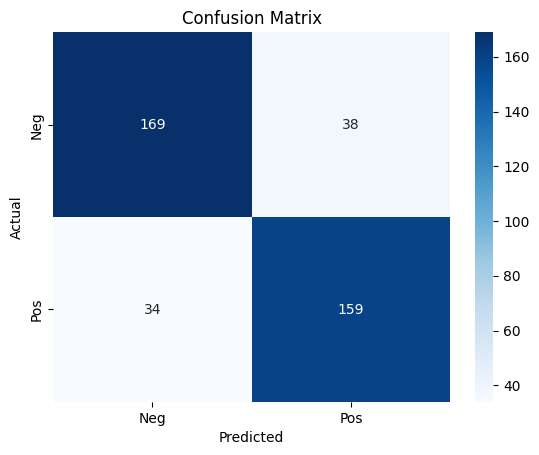

In [8]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
def predict_sentiment(text):
    processed = preprocess_text(text)
    vector = vectorizer.transform([processed]).toarray()
    prediction = model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

# Example
print(predict_sentiment("I loved the movie! The acting was superb."))
print(predict_sentiment("Awesome movie"))


Positive
Positive
